## Using Apriori Algorithm

<img src="https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fblogs-images.forbes.com%2Fmarciaturner%2Ffiles%2F2018%2F01%2FWegmans-Produce-1.jpg" width="800px">

Frequent Itemsets via Apriori Algorithm

Apriori function to extract frequent itemsets for association rule mining

We have a dataset of a mall with 7500 transactions of different customers buying different items from the store.
We need to find correlations between the different items in the store. so that we can know the next item the customer would be interested in buying from the store if they are buying apples, bananas, and mangos. 

## Overview
Apriori is a popular algorithm for extracting frequent itemsets with applications in association rule learning. The apriori algorithm has been designed to operate on databases containing transactions, such as purchases by customers of a store. An itemset is considered as "frequent" if it meets a user-specified support threshold. For instance, if the support threshold is set to 0.5 (50%), a frequent itemset is defined as a set of items that occur together in at least 50% of all transactions in the database.

**Importing libraries**

In [ ]:
# conda install -c conda-forge squarify
# conda install -c conda-forge mlxtend

In [1]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

# for defining path
import os
# print(os.listdir('../input/'))

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


**Importing the dataset**

In [2]:
# reading the dataset

data = pd.read_csv('store_transaction.csv', header = None)

# let's check the shape of the dataset
data.shape

(7501, 20)

In [3]:
import pandas

In [4]:
# checking the head of the data

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# checkng the tail of the data

data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# checking the random entries in the data

data.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
607,grated cheese,ground beef,mineral water,olive oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5317,fresh tuna,milk,magazines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3236,eggs,honey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
534,frozen vegetables,soup,almonds,eggs,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1853,mineral water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1686,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6309,honey,green tea,melons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3738,burgers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2585,burgers,butter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1757,mineral water,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# let's describe the dataset

data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


## Data Visualizations

In [8]:
all_elements = data.values.tolist()
flat_list = [item for sublist in all_elements for item in sublist]
cleanedList = [x for x in flat_list if str(x) != 'nan']
temp_df = pd.DataFrame({'col':cleanedList})

/Users/ting-chienhuang/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


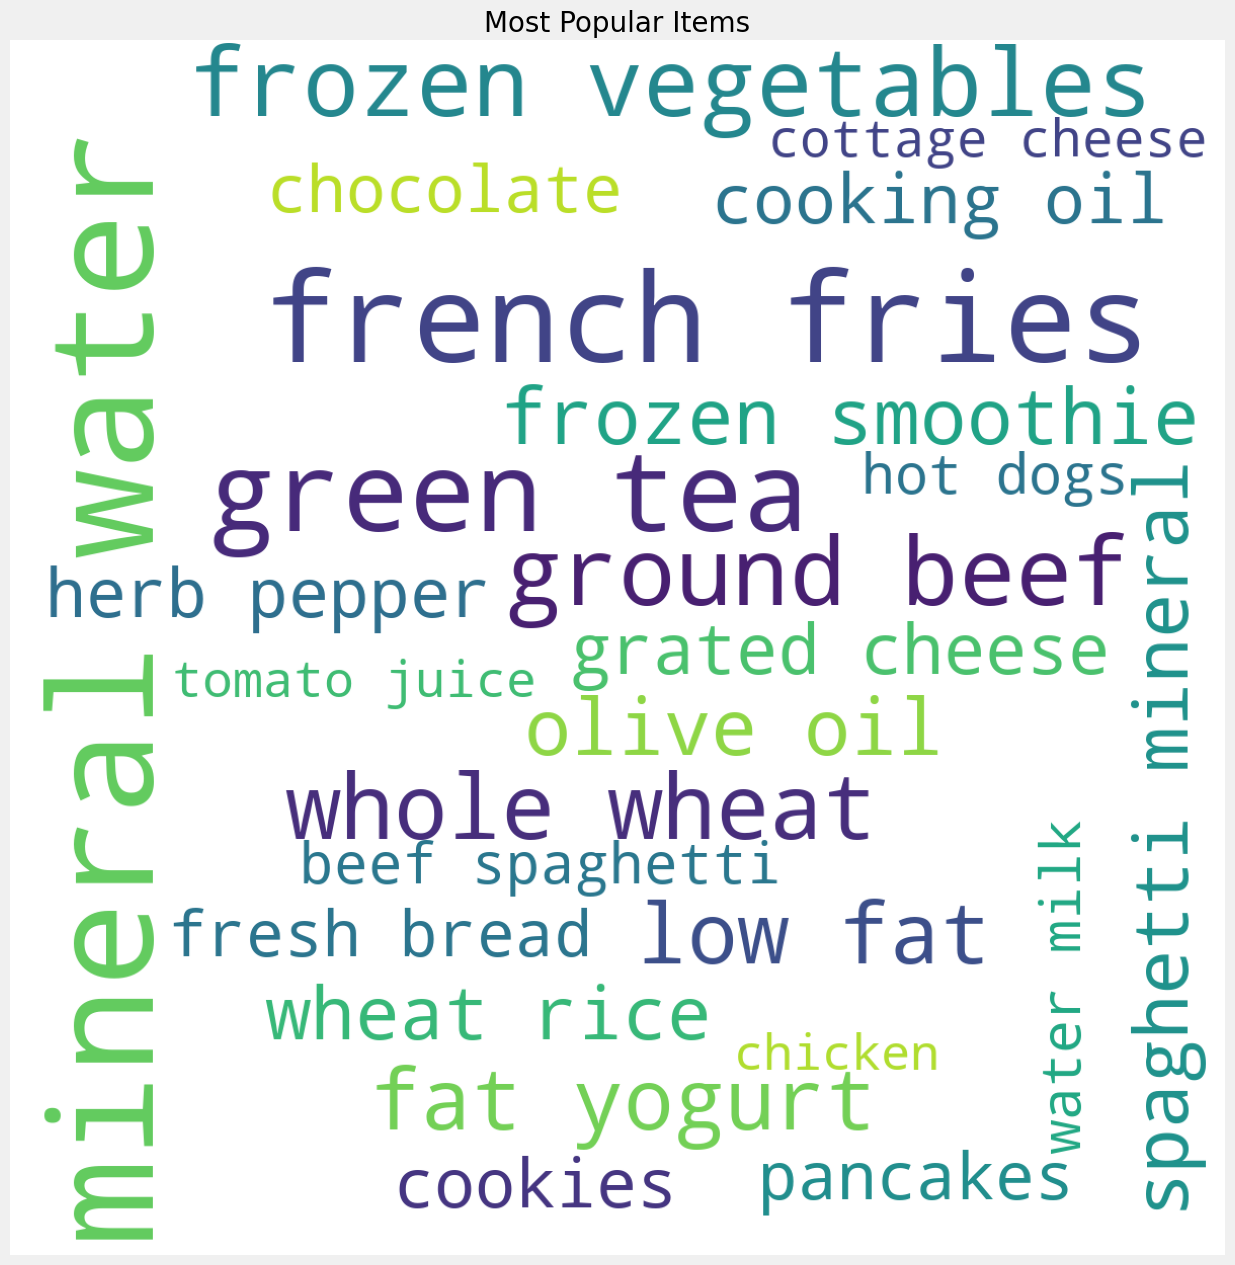

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 25, regexp = r"\w[\w]+").generate(str(cleanedList))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()
wordcloud.to_file("25_words.png")


/Users/ting-chienhuang/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


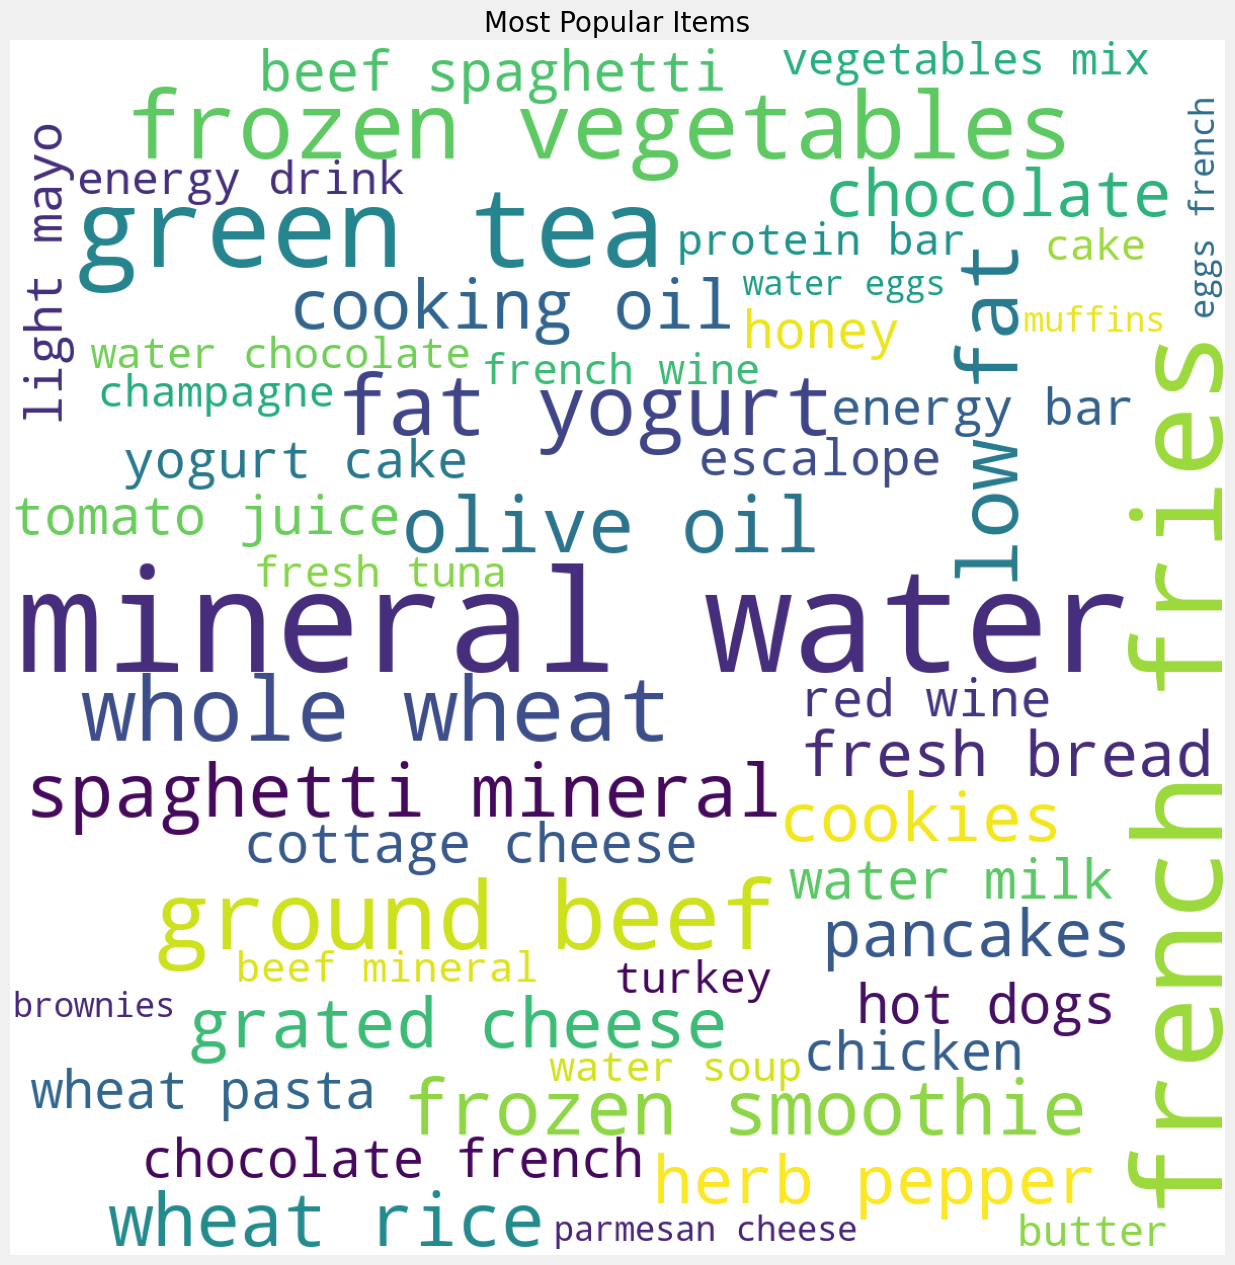

In [10]:
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 50, regexp = r"\w[\w]+").generate(str(cleanedList))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()
wordcloud.to_file("50_words.png")

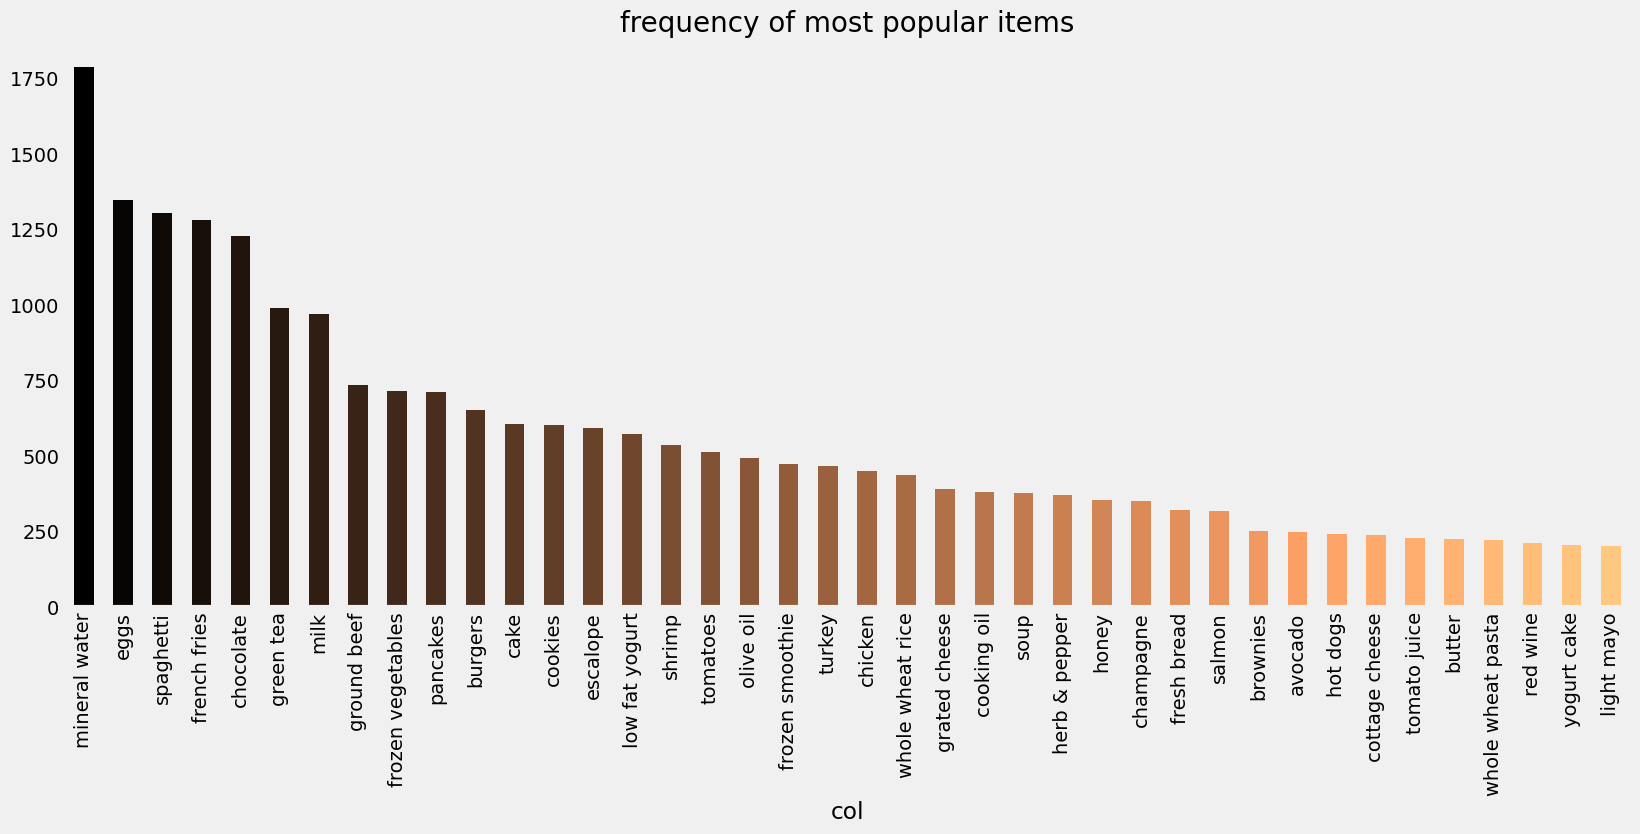

In [12]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
temp_df['col'].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

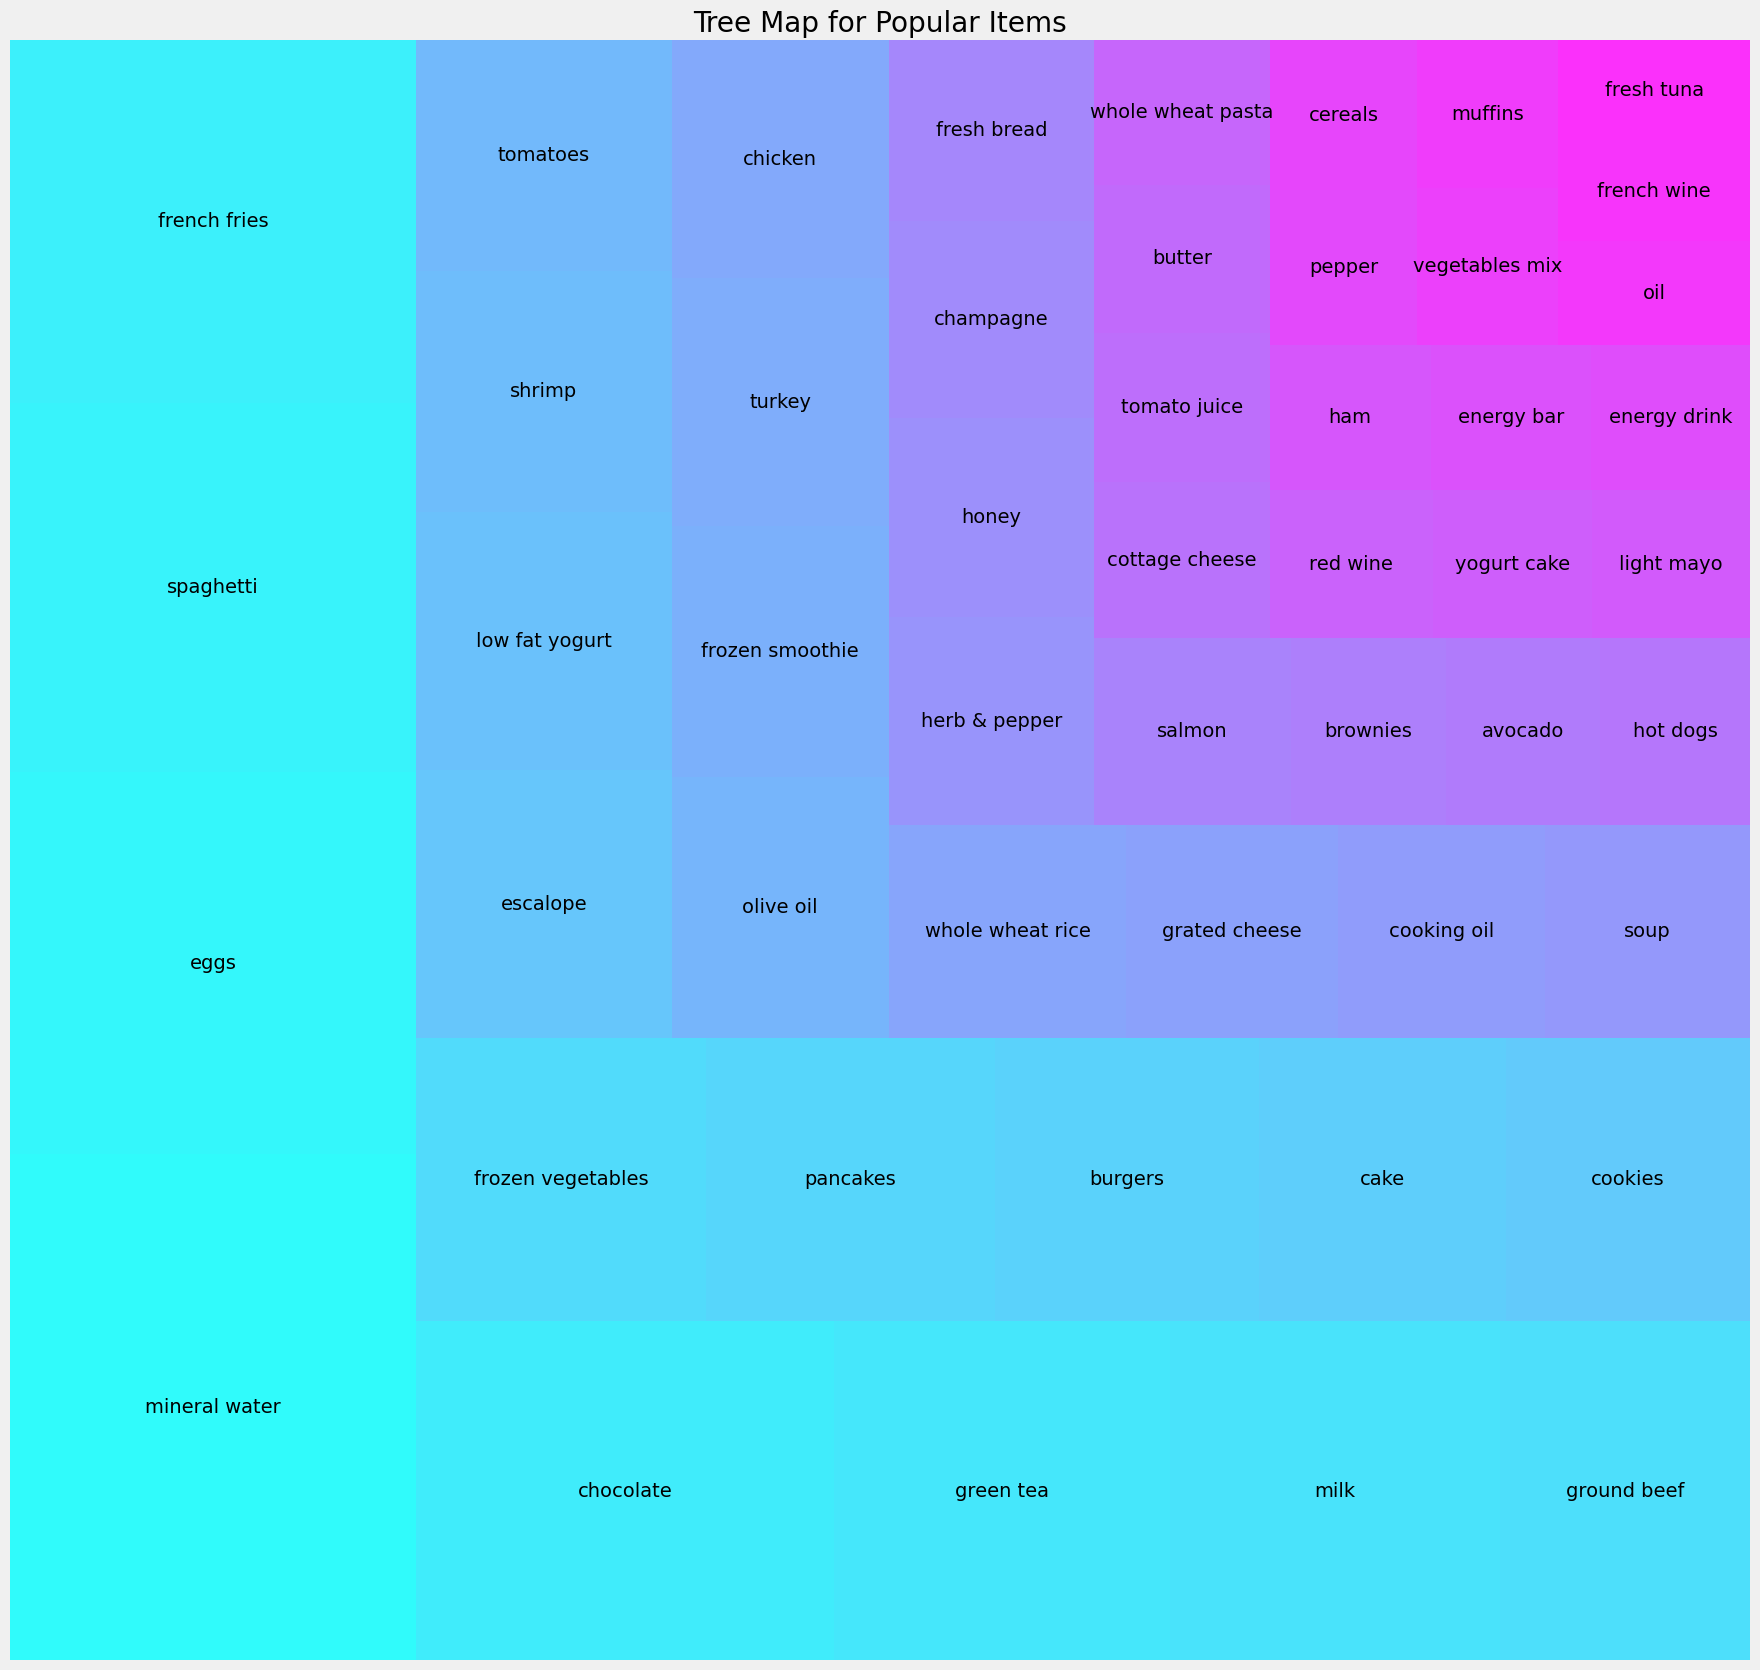

In [13]:
y = temp_df['col'].value_counts().head(50).to_frame()

# plotting a tree map

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

## Data Preprocessing

In [13]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# conveting it into a numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7501, 20)


## Using Transaction encoder

In [14]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# To know more about TransactionEncoder go to  http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/

print(trans)

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.shape
print(data)

del data['nan']

# try on the new data below by yourself
new_data = [['Apple', 'Beer', 'Rice', 'Chicken'],
            ['Apple', 'Beer', 'Rice'], 
            ['Apple', 'Beer'], 
            ['Apple', 'Bananas'], 
            ['Milk', 'Beer', 'Rice', 'Chicken'], 
            ['Milk', 'Beer', 'Rice'], 
            ['Milk', 'Beer'], 
            ['Apple', 'Bananas']]
new_trans = []
for i in range(0, 8):
    the_tran = new_data[i]
    the_tran.extend('nan' for j in range(0, 4-len(new_data[i])))
    new_trans.append(the_tran)
new_trans = np.array(new_trans)
    
print(new_data)
    

[['shrimp' 'almonds' 'avocado' ... 'frozen smoothie' 'spinach'
  'olive oil']
 ['burgers' 'meatballs' 'eggs' ... 'nan' 'nan' 'nan']
 ['chutney' 'nan' 'nan' ... 'nan' 'nan' 'nan']
 ...
 ['chicken' 'nan' 'nan' ... 'nan' 'nan' 'nan']
 ['escalope' 'green tea' 'nan' ... 'nan' 'nan' 'nan']
 ['eggs' 'frozen smoothie' 'yogurt cake' ... 'nan' 'nan' 'nan']]
       asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0          False     True               True      False     True        False   
1          False    False              False      False    False        False   
2          False    False              False      False    False        False   
3          False    False              False      False     True        False   
4          False    False              False      False    False        False   
...          ...      ...                ...        ...      ...          ...   
7496       False    False              False      False    False        False   
74

In [20]:
np.unique(new_data)

array(['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice', 'nan'],
      dtype='<U7')

## Applying apriori

<img src="https://blog-c7ff.kxcdn.com/blog/wp-content/uploads/2017/03/Apriori-Algorithm.jpg" width="500px">

## How does Apriori Algorithm Work ?

A key concept in Apriori algorithm is the anti-monotonicity of the support measure. It assumes that

* All subsets of a frequent itemset must be frequent
* Similarly, for any infrequent itemset, all its supersets must be infrequent too

**Step 1**: Create a frequency table of all the items that occur in all the transactions.

**Step 2**: We know that only those elements are significant for which the support is greater than or equal to the threshold support.

**Step 3**: The next step is to make all the possible pairs of the significant items keeping in mind that the order doesn’t matter, i.e., AB is same as BA.

**Step 4**: We will now count the occurrences of each pair in all the transactions.

**Step 5**: Again only those itemsets are significant which cross the support threshold

**Step 6**: Now let’s say we would like to look for a set of three items that are purchased together. We will use the itemsets found in step 5 and create a set of 3 items.

In [15]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 1% support:
apriori(data, min_support = 0.01, use_colnames = True)


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(ground beef, milk, mineral water)"
253,0.017064,"(spaghetti, ground beef, mineral water)"
254,0.015731,"(spaghetti, milk, mineral water)"
255,0.010265,"(spaghetti, olive oil, mineral water)"


In [16]:
apriori(data, min_support = 0.02, use_colnames = True)

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.033729,(brownies)
3,0.087188,(burgers)
4,0.030129,(butter)
...,...,...
98,0.020131,"(whole wheat rice, mineral water)"
99,0.022930,"(spaghetti, olive oil)"
100,0.025197,"(pancakes, spaghetti)"
101,0.021197,"(spaghetti, shrimp)"


In [17]:
apriori(data, min_support = 0.03, use_colnames = True)

,support,itemsets
0,0.033329,(avocado)
1,0.033729,(brownies)
2,0.087188,(burgers)
3,0.030129,(butter)
4,0.081056,(cake)
5,0.046794,(champagne)
6,0.059992,(chicken)
7,0.163845,(chocolate)
8,0.080389,(cookies)
9,0.051060,(cooking oil)


In [18]:
apriori(data, min_support = 0.04, use_colnames = True)

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.046794,(champagne)
3,0.059992,(chicken)
4,0.163845,(chocolate)
5,0.080389,(cookies)
6,0.051060,(cooking oil)
7,0.179709,(eggs)
8,0.079323,(escalope)
9,0.170911,(french fries)


In [19]:
apriori(data, min_support = 0.05, use_colnames = True)

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [20]:
apriori(data, min_support = 0.06, use_colnames = True)

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.163845,(chocolate)
3,0.080389,(cookies)
4,0.179709,(eggs)
5,0.079323,(escalope)
6,0.170911,(french fries)
7,0.063325,(frozen smoothie)
8,0.095321,(frozen vegetables)
9,0.132116,(green tea)


In [21]:
apriori(data, min_support = 0.08, use_colnames = True)

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.163845,(chocolate)
3,0.080389,(cookies)
4,0.179709,(eggs)
5,0.170911,(french fries)
6,0.095321,(frozen vegetables)
7,0.132116,(green tea)
8,0.098254,(ground beef)
9,0.129583,(milk)


In [22]:
apriori(data, min_support = 0.1, use_colnames = True)

,support,itemsets
0,0.163845,(chocolate)
1,0.179709,(eggs)
2,0.170911,(french fries)
3,0.132116,(green tea)
4,0.129583,(milk)
5,0.238368,(mineral water)
6,0.174110,(spaghetti)


In [23]:
apriori(data, min_support = 0.12, use_colnames = True)

,support,itemsets
0,0.163845,(chocolate)
1,0.179709,(eggs)
2,0.170911,(french fries)
3,0.132116,(green tea)
4,0.129583,(milk)
5,0.238368,(mineral water)
6,0.174110,(spaghetti)


In [24]:
apriori(data, min_support = 0.16, use_colnames = True)

,support,itemsets
0,0.163845,(chocolate)
1,0.179709,(eggs)
2,0.170911,(french fries)
3,0.238368,(mineral water)
4,0.174110,(spaghetti)


In [25]:
apriori(data, min_support = 0.2, use_colnames = True)

,support,itemsets
0,0.238368,(mineral water)


In [26]:
eight_answer = {"Support Threshold Percentage": ["1","2","3","4","5","6","8","10","12","16","20"],
               "Number of Itemsets": [257,103,54,35,28,20,13,7,7,5,1]}
eight_df = pd.DataFrame(eight_answer)
eight_df

,Support Threshold Percentage,Number of Itemsets
0,1,257
1,2,103
2,3,54
3,4,35
4,5,28
5,6,20
6,8,13
7,10,7
8,12,7
9,16,5


<Axes: xlabel='Support Threshold Percentage'>

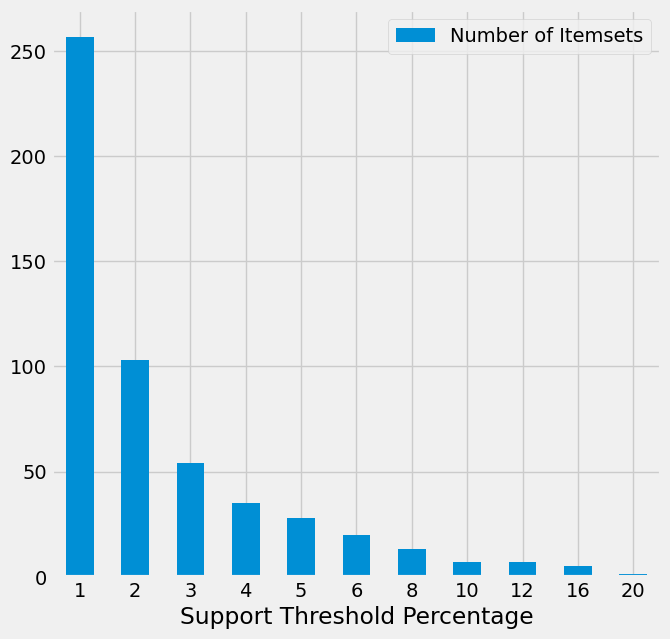

In [30]:
eight_df.plot.bar(x = "Support Threshold Percentage", y = "Number of Itemsets", rot = 0, figsize = (7,7))

The advantage of working with pandas DataFrames is that we can use its convenient features to filter the results. For instance, let's assume we are only interested in itemsets of length 2 that have a support of at least 80 percent. First, we create the frequent itemsets via apriori and add a new column that stores the length of each itemset:

## Selecting and Filtering the Results

In [49]:
frequent_itemsets = apriori(data, min_support = 0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.020397,(almonds),1
1,0.033329,(avocado),1
2,0.010799,(barbecue sauce),1
3,0.014265,(black tea),1
4,0.011465,(body spray),1
...,...,...,...
252,0.011065,"(ground beef, milk, mineral water)",3
253,0.017064,"(spaghetti, ground beef, mineral water)",3
254,0.015731,"(spaghetti, milk, mineral water)",3
255,0.010265,"(spaghetti, olive oil, mineral water)",3


In [47]:
# getting th item sets with length = 2 and support more han 1%
support_threhold = 0.01
length = 2

frequent_itemsets = apriori(data, min_support = support_threhold, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ])
print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ].shape)

      support                       itemsets  length
75   0.011598       (avocado, mineral water)       2
76   0.011465                (cake, burgers)       2
77   0.017064           (chocolate, burgers)       2
78   0.028796                (burgers, eggs)       2
79   0.021997        (burgers, french fries)       2
..        ...                            ...     ...
235  0.011199             (tomatoes, shrimp)       2
236  0.014265              (soup, spaghetti)       2
237  0.020931          (spaghetti, tomatoes)       2
238  0.016531            (turkey, spaghetti)       2
239  0.014131  (whole wheat rice, spaghetti)       2

[165 rows x 3 columns]
(165, 3)


In [34]:
frequent_itemsets = apriori(data, min_support = 0.02, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ])
print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ].shape)

      support                            itemsets  length
53   0.028796                     (burgers, eggs)       2
54   0.021997             (burgers, french fries)       2
55   0.024397            (burgers, mineral water)       2
56   0.021464                (spaghetti, burgers)       2
57   0.027463               (cake, mineral water)       2
58   0.022797            (chicken, mineral water)       2
59   0.033196                   (chocolate, eggs)       2
60   0.034395           (chocolate, french fries)       2
61   0.022930      (frozen vegetables, chocolate)       2
62   0.023464              (chocolate, green tea)       2
63   0.023064            (chocolate, ground beef)       2
64   0.032129                   (chocolate, milk)       2
65   0.052660          (chocolate, mineral water)       2
66   0.039195              (chocolate, spaghetti)       2
67   0.020131        (cooking oil, mineral water)       2
68   0.036395                (eggs, french fries)       2
69   0.021730 

In [35]:
frequent_itemsets = apriori(data, min_support = 0.03, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ])
print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ].shape)

     support                            itemsets  length
36  0.033196                   (chocolate, eggs)       2
37  0.034395           (chocolate, french fries)       2
38  0.032129                   (chocolate, milk)       2
39  0.052660          (chocolate, mineral water)       2
40  0.039195              (chocolate, spaghetti)       2
41  0.036395                (eggs, french fries)       2
42  0.030796                        (eggs, milk)       2
43  0.050927               (eggs, mineral water)       2
44  0.036528                   (spaghetti, eggs)       2
45  0.033729       (french fries, mineral water)       2
46  0.035729  (frozen vegetables, mineral water)       2
47  0.031063          (green tea, mineral water)       2
48  0.040928        (ground beef, mineral water)       2
49  0.039195            (spaghetti, ground beef)       2
50  0.047994               (milk, mineral water)       2
51  0.035462                   (spaghetti, milk)       2
52  0.033729           (pancake

In [36]:
frequent_itemsets = apriori(data, min_support = 0.04, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ])
print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ].shape)

     support                      itemsets  length
30  0.052660    (chocolate, mineral water)       2
31  0.050927         (eggs, mineral water)       2
32  0.040928  (ground beef, mineral water)       2
33  0.047994         (milk, mineral water)       2
34  0.059725    (spaghetti, mineral water)       2
(5, 3)


In [37]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ])
print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ].shape)

     support                    itemsets  length
25  0.052660  (chocolate, mineral water)       2
26  0.050927       (eggs, mineral water)       2
27  0.059725  (spaghetti, mineral water)       2
(3, 3)


In [38]:
ten_answer = {"Support Threshold Percentage": ["1","2","3","4","5"],
               "Number of Itemsets": [165,50,18,5,3]}
ten_df = pd.DataFrame(ten_answer)
ten_df

,Support Threshold Percentage,Number of Itemsets
0,1,165
1,2,50
2,3,18
3,4,5
4,5,3


<Axes: xlabel='Support Threshold Percentage'>

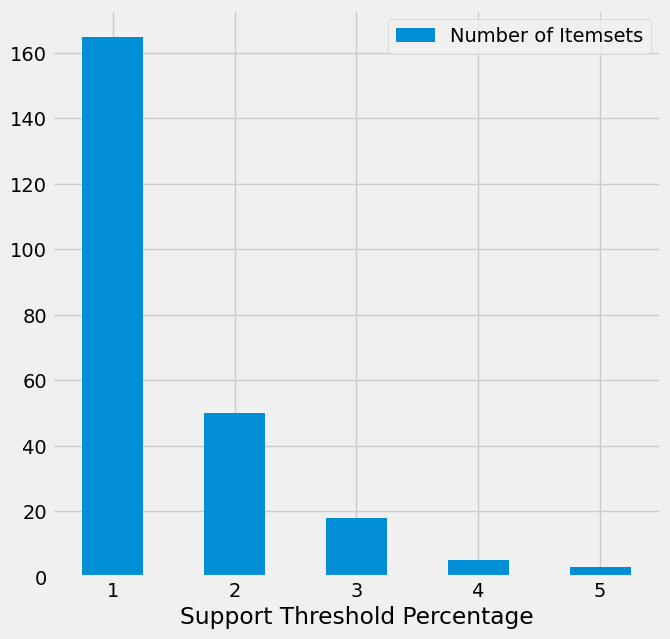

In [39]:
ten_df.plot.bar(x = "Support Threshold Percentage", y = "Number of Itemsets", rot = 0, figsize = (7,7))

## Association Mining

In [40]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'mineral water'}]

,support,itemsets,length
16,0.238368,(mineral water),1


In [41]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'eggs'}]

,support,itemsets,length
6,0.179709,(eggs),1


In [51]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'spaghetti'}]

,support,itemsets,length
63,0.17411,(spaghetti),1


In [43]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'chocolate'}]

,support,itemsets,length
3,0.163845,(chocolate),1


In [44]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'chocolate', 'mineral water'}]

,support,itemsets,length
25,0.05266,"(chocolate, mineral water)",2


This notebook is adaption from the following kaggle notebook https://www.kaggle.com/roshansharma/market-basket-analysis.